# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)

Please see rna63_project_part2.ipynb for the complete overview of the team and project.


In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --user

In [147]:
# Set this to False to run full version.
sampled = False

In [148]:
if sampled:
    dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
else:  # Full dataset
    dataset_path = "craigslist_full_cleaned_2023_03_12_10_45_22.csv"

target_col = 'price'

In [149]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,11900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,21000.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,1500.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,4900.0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


In [150]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393903,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white,wy
393904,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red,wy
393905,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white,wy
393906,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver,wy


y

0          6000.0
1         11900.0
2         21000.0
3          1500.0
4          4900.0
           ...   
393903    23590.0
393904    30590.0
393905    34990.0
393906    28990.0
393907    30590.0
Name: price, Length: 393908, dtype: float64

In [151]:
from sklearn import preprocessing

In [152]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [153]:
# uncomment and run this if needed.
!pip install category_encoders

In [154]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [155]:
# Convert categorical columns to Pandas category type

cats = X_all.select_dtypes(exclude=np.number).columns.tolist()
print("cats:")
display(cats)
for col in cats:
    X_all[col] = X_all[col].astype('category')

display(X_all.dtypes)
display(X_all.head())

cats:


['make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

year             float64
make            category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,az
1,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ar
2,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,fl
3,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,ma
4,2011.406247,ford,f-150,good,6 cylinders,gas,92647.432999,clean,automatic,4wd,full-size,sedan,white,nc


## Data Dictionary

These are the columns we used from the Craigslist dataset.

|     Name     |  dtype   | Description | Null % | Notes |
|--------------|----------|--------------|--------------|--------------|
| price | float64 | Listed sale price | 0.0 |  | 
| year | float64 | Year of manufacture | 0.002823 | n/a |
| make | category | Auto manufacturer name | 0.041337 | Renamed from manufacturer |
| model | category | Car model name | 0.012362 | n/a |
| condition | category | Listed condition of vehicle | 0.407852 | n/a |
| cylinders | category | Number of engine cylinders | 0.416225 | n/a |
| fuel | category | Type of fuel used by vehicle (i.e. gas, deisel, electric) | 0.007058 | n/a |
| odometer | float64 | Odometer mileage of vehicle | 0.010307 | n/a |
| title_status | category | Status of vehicle title (i.e. clean, salvage) | 0.019308 | n/a |
| transmission | category | Type of vehicle transmission (i.e. automatic, manual) | 0.005988 | n/a |
| drive | category | Drive type of vehicle (i.e. fwd, 4wd) | 0.305863 | n/a |
| size | category | Size of vehicle(i.e. full-size) | 0.717675 | n/a |
| type | category | Vehicle type, (i.e. sedan,pickup) | 0.217527 | n/a |
| paint_color | category | Exterior paint color of vehicle | 0.305011 | n/a |
| state | category | State of vehicle location(i.e. WA, PI) | 0.000000 | n/a |

### Unused Columns

These columns we dropped after EDA before cleaning the data set.


    'id', 'url', 'region', 'VIN', 'region_url', 'county', 'lat', 'long', 'description', 'image_url', 'posting_date'
    
    
We dropped id, url, VIN, image_url because they are likely unique to each listing and uninformative.

We dropped posting_date because the dataset only has data from a limited time frame so this field is not likely to have a long enough date range to determine things like seasonality.


We dropped the columns region, region_url, county, lat, and long so that we could just use state as a single more easily usable column for the effect of the vehicle location on price.



In [156]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)

In [157]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [158]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [159]:
# This command will try to get an up to date version.
#!pip install --user --upgrade xgboost
!pip install --user xgboost

In [160]:
import xgboost as xgb

In [161]:
# on the Mac GPUs (at least on my M2 macbook air), the CUDA libraries that XGBoost uses do not support the GPU.
# This means we are stuck with CPU for XGBoost or run it on something else.
import platform
platform.processor()
plat = platform.system()
print("Platform: ", plat)

Platform:  Darwin


In [245]:
# hyperparameters for XGBoost and notes from experimenting with them.

# If you have GPU support, enable with this.
# params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {}
params['objective'] = "reg:squarederror"

#params['learning_rate'] = .1 # learning_rate
# was still improving after 5000 rounds with .1 learning rate
# RMSE of train data:  3148.6374127464414
# RMSE of test data:  5077.025190920731
# R2 Score of test data: 0.872617141105975

# params['learning_rate'] = .2
# still only improvement after 5000 rounds and .2 lr
# RMSE of train data:  2263.7331220326378
# RMSE of test data:  4964.672293997728
# R2 Score of test data: 0.8781926403808091
# Saving model to model_xgboost_2023_03_13_11_48_48.pkl
# Saving model to model_preprocessor_f_2023_03_13_11_48_48.pkl

# params['learning_rate'] = .5
# RMSE of train data:  1243.8832871951065
# RMSE of test data:  5133.313632049499
# R2 Score of test data: 0.8697769227457282
# Saving model to model_xgboost_2023_03_13_12_47_46.pkl

params['learning_rate'] = .3
# the one for the feature importance has ~ 4400 RMSE on test set.
# best so far.
# RMSE of train data:  1771.4766651398668
# RMSE of test data:  4944.281393534352
# R2 Score of test data: 0.8791911598987936
# Saving model to model_preprocessor_f_2023_03_13_14_22_04.pkl
# Saving model to model_xgboost_2023_03_13_16_35_43.pkl


In [208]:
# Setup pipelines for comparison

linear_pipeline = Pipeline(steps=[
                                  ('pre_processing',pre_process),
                                  ('reg', LinearRegression())
                                 ])

ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 
                                 ('reg', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])

# NOTE: Add tree_method="gpu_hist" here as well if supported and desired.
xgb_reg = xgb.XGBRegressor(objective=params['objective'], learning_rate=params['learning_rate'])

xgb_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', xgb_reg)
                                 ])

pipelines = {
    'linear':linear_pipeline,
    'ridge': ridge_pipeline,
    'lasso': lasso_pipeline,
    'random_forest': rf_pipeline,
    'xgboost': xgb_pipeline
}


In [209]:
from sklearn.model_selection import cross_validate

In [210]:
def cross_validate_pipeline(label, pipeline):    
    scoring = "neg_mean_squared_error"
    n_cv_folds = 3

    print("cross validate for:", label)
    result = cross_validate(pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
    display(result)

    return result

In [211]:
def plot_residuals(predict_train, predict_test):

    plt.scatter(
        predict_train,
        predict_train - y_train,
        c='blue',
        marker='o',
        label='Training data')

    plt.scatter(
        predict_test,
        predict_test - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
    
    plt.tight_layout()
    plt.show()

In [212]:
def show_samples(X_vals, y_vals, predictions):
    samples = X_vals.copy()
    samples[target_col] = y_vals
    samples['predicted_price'] = predictions
    display(samples)


In [213]:
from sklearn.metrics import r2_score

def score_pipeline(pipeline):
    predict_train = pipeline.predict(X_train)
    predict_test = pipeline.predict(X_test)
    
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    # r2 == https://en.wikipedia.org/wiki/Coefficient_of_determination
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)  # r2 anyway
    print("R2 score", r2)
    
    scores = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'score': score,
        'r2_score': r2, 
    }
    results = {
        'scores':scores,
        'predict_train': predict_train,
        'predict_test': predict_test
    }
    print("scores:", scores)
    return results

In [214]:
import joblib
from datetime import datetime

def save_model(model_name, model, use_ts=True):
    if use_ts:
        rn = datetime.now()
        dts = '_' + rn.strftime("%Y_%m_%d_%H_%M_%S")
    else:
        dts = ''

    dest_path = f"model_{model_name}{dts}.pkl"
    print(f"Saving model to {dest_path}")
    joblib.dump(model, dest_path)
    
    return dest_path

def load_model(model_path):
    print(f"Loading model from {model_path}")
    model = joblib.load(model_path)
    return model

In [215]:
def eval_pipeline(label, pipeline):
    cross_validate_pipeline(label, pipeline)
    
    rmod = pipeline.fit(X_train,y_train)
    display(rmod)
    
    results = score_pipeline(pipeline)
     
    show_samples(X_test, y_test, results['predict_test'])
    plot_residuals(results['predict_train'], results['predict_test'])
    
    return rmod, results

Evaluating linear

cross validate for: linear


{'fit_time': array([7.71785188, 9.3380177 , 8.56166196]),
 'score_time': array([0.17239189, 0.17298293, 0.17204618]),
 'test_score': array([-7.19701281e+07, -1.35943948e+08, -1.66982678e+08])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', LinearRegression())])

RMSE of train data:  6456.24166019595
RMSE of test data:  7201.659534204902
model score: 0.744
R2 score 0.7436947354564545
scores: {'train_rmse': 6456.24166019595, 'test_rmse': 7201.659534204902, 'score': 0.7436947354564545, 'r2_score': 0.7436947354564545}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,25377.851460
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,19616.974809
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2979.288157
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23816.293046
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,81.927880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,7414.851403
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,13896.115024
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,209.372351
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,13669.965710


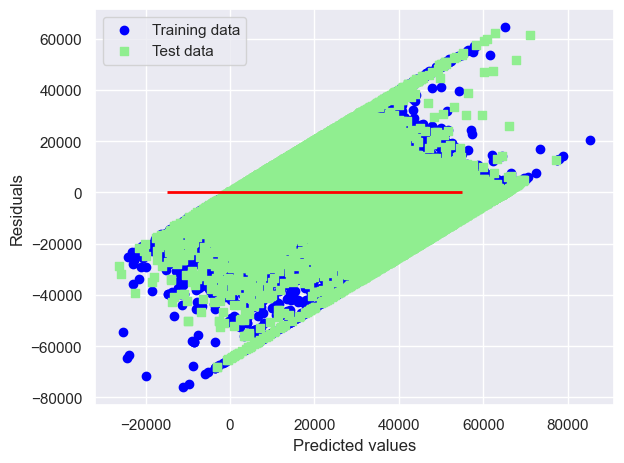

Evaluating ridge

cross validate for: ridge


{'fit_time': array([20.96201396, 22.79732418, 18.85278797]),
 'score_time': array([0.17489982, 0.17148376, 0.17436099]),
 'test_score': array([-76786460.86271247, -59119242.11121011, -71548214.5905433 ])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor())])

RMSE of train data:  7900.762020065
RMSE of test data:  7998.884433727851
model score: 0.684
R2 score 0.6838077655771385
scores: {'train_rmse': 7900.762020065, 'test_rmse': 7998.884433727851, 'score': 0.6838077655771385, 'r2_score': 0.6838077655771385}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,30476.138466
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,21225.537767
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2261.571699
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23631.148393
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,-1694.467254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8261.267489
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,12713.403968
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,-353.253235
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,15318.664567


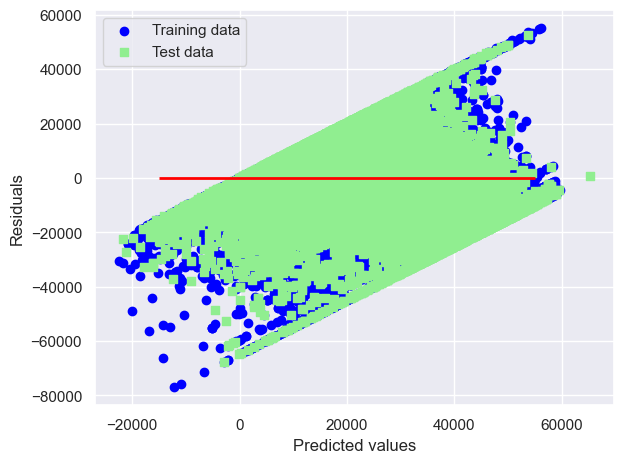

Evaluating lasso

cross validate for: lasso


/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'fit_time': array([87.77714801, 53.04136491, 50.64163184]),
 'score_time': array([0.17642689, 0.17873287, 0.19350195]),
 'test_score': array([-72317453.640166  , -55499093.16517273, -66176590.46051124])}

/opt/homebrew/Caskroom/miniconda/base/envs/ds/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor(penalty='l1'))])

RMSE of train data:  7302.526901012259
RMSE of test data:  7511.0948275158
model score: 0.721
R2 score 0.7211960996367286
scores: {'train_rmse': 7302.526901012259, 'test_rmse': 7511.0948275158, 'score': 0.7211960996367286, 'r2_score': 0.7211960996367286}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,28680.700754
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,20206.102935
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2322.664446
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,23584.743990
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,-1373.013465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8057.673257
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,12811.309542
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,-244.070817
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,15094.755437


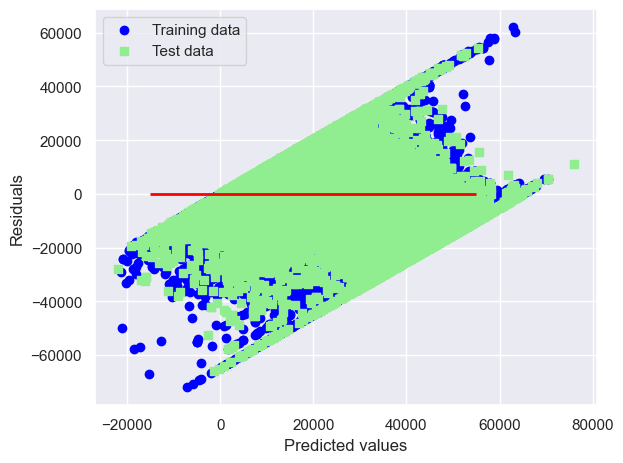

Evaluating random_forest

cross validate for: random_forest


{'fit_time': array([1392.19590497,  132.24354506,  124.25368023]),
 'score_time': array([0.79232502, 0.80966902, 0.78376079]),
 'test_score': array([-73128326.53795086, -57013734.37640717, -68708431.26695243])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=10, random_state=191))])

RMSE of train data:  7716.302885302759
RMSE of test data:  7831.58202896849
model score: 0.697
R2 score 0.6968962165516847
scores: {'train_rmse': 7716.302885302759, 'test_rmse': 7831.58202896849, 'score': 0.6968962165516847, 'r2_score': 0.6968962165516847}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,29906.533979
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,22592.897989
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,10174.097273
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,29105.598735
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,6127.289598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,10967.242632
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,11740.977672
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,6189.568493
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,7244.964194


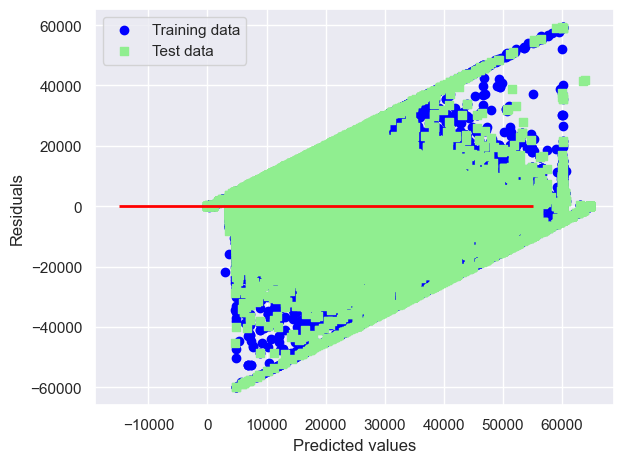

Evaluating xgboost

cross validate for: xgboost


{'fit_time': array([10.60456991, 10.85764599, 11.32684994]),
 'score_time': array([0.22555113, 0.23776507, 0.24651694]),
 'test_score': array([-60055743.56585671, -45290692.92602835, -55598760.25759258])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'],...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

RMSE of train data:  6460.179585449519
RMSE of test data:  6656.607798452389
model score: 0.781
R2 score 0.7810231046627285
scores: {'train_rmse': 6460.179585449519, 'test_rmse': 6656.607798452389, 'score': 0.7810231046627285, 'r2_score': 0.7810231046627285}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
373916,2017.0,ford,edge sel awd gas suv auto,good,6 cylinders,gas,28669.0,clean,automatic,4wd,full-size,SUV,white,wa,25999.0,30986.564453
379496,2018.0,mitsubishi,outlander,good,6 cylinders,gas,76935.0,clean,automatic,4wd,full-size,SUV,black,wa,18999.0,27974.347656
99114,2011.0,chevrolet,impala,fair,6 cylinders,gas,172000.0,clean,automatic,4wd,full-size,sedan,white,fl,3800.0,2453.856445
359203,2018.0,nissan,frontier,excellent,6 cylinders,gas,55020.0,clean,automatic,4wd,mid-size,pickup,red,vt,23998.0,29160.998047
105068,2012.0,hyundai,veloster,good,4 cylinders,gas,170000.0,clean,automatic,fwd,full-size,sedan,white,fl,1495.0,6213.277832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245394,2011.0,kia,sorento,like new,6 cylinders,gas,132000.0,clean,automatic,4wd,full-size,SUV,white,ny,8950.0,8220.815430
137137,2015.0,gmc,terrain,good,4 cylinders,gas,90927.0,clean,automatic,fwd,full-size,SUV,grey,il,11495.0,11986.056641
75433,2008.0,ford,focus,good,4 cylinders,gas,130000.0,clean,automatic,fwd,full-size,sedan,silver,ct,3300.0,3755.522705
222443,2004.0,ford,f-150,excellent,8 cylinders,gas,174000.0,clean,automatic,4wd,full-size,pickup,white,nc,10500.0,9293.668945


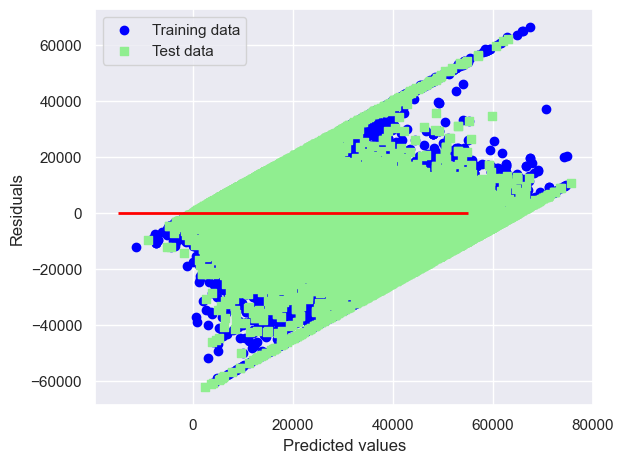

In [216]:
all_results = []
for label, pipeline in pipelines.items():
    show_heading(f"Evaluating {label}", 2)
    rmod, results = eval_pipeline(label, pipeline)
    scores = {'label': label}
    scores.update(results['scores'])
    all_results.append(scores)

In [217]:
df = pd.DataFrame.from_dict(all_results)

show_heading("Pipeline Score Summary")
display(df)

Pipeline Score Summary

,label,train_rmse,test_rmse,score,r2_score
0,linear,6456.241660,7201.659534,0.743695,0.743695
1,ridge,7900.762020,7998.884434,0.683808,0.683808
2,lasso,7302.526901,7511.094828,0.721196,0.721196
3,random_forest,7716.302885,7831.582029,0.696896,0.696896
4,xgboost,6460.179585,6656.607798,0.781023,0.781023


In [218]:
def plot_evals_result(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    x = None
    
    lines = {}
    for key, values in results.items():
        print("key:", key)
        if x is None:
            n_rounds = len(values)
            x = np.linspace(0, n_rounds, n_rounds)
            
        lines[key],  = ax.plot(x, values, label=key)
        ax.legend()

    plt.show()
    

In [219]:
# Callback for xgboost to save error metrics by epoch.
class EvalCapture(xgb.callback.TrainingCallback):
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.lines = {}
        self.x = np.linspace(0, self.rounds, self.rounds)
        self.evals_log = None
        
    def _get_key(self, data, metric):
        return f'{data}-{metric}'

    def evals_result(self):
        # return results as dict of array of values for each round.
        results = {}
        
        for data, metric in self.evals_log.items():
            for metric_name, log in metric.items():
                key = self._get_key(data, metric_name)
                results[key] = log
        return results
         
    def after_iteration(self, model, epoch, evals_log):
        # Keep most recent log
        self.evals_log = evals_log
        return False

In [233]:
def xgboost_fit(X_train, y_train, X_test, y_test, enable_cat, n_rounds = 5000):
    # This is the non pipeline version for helping with measuring feature importance.

    # Convert to the format XGBoost lib expects.
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=enable_cat)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=enable_cat)

    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    evals_capture = EvalCapture(n_rounds)
    
    model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n_rounds,
      evals=evals,
      verbose_eval=50, # print every N rounds
      early_stopping_rounds=10,  # stop if no improvement to validation loss in N rounds.
      callbacks=[evals_capture]
    )

    evals_result = evals_capture.evals_result()
    plot_evals_result(evals_result)
    
    predict_test = model.predict(dtest_reg)
    predict_train = model.predict(dtrain_reg)
    
    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
        
    return model


[0]	validation-rmse:17700.86754	train-rmse:17661.88350
[50]	validation-rmse:6585.96655	train-rmse:6451.25734
[100]	validation-rmse:6100.74218	train-rmse:5873.59282
[150]	validation-rmse:5824.87688	train-rmse:5507.42456
[200]	validation-rmse:5653.11306	train-rmse:5257.61411
[250]	validation-rmse:5517.36801	train-rmse:5046.84969
[300]	validation-rmse:5402.39979	train-rmse:4871.89035
[350]	validation-rmse:5317.85035	train-rmse:4731.85542
[400]	validation-rmse:5242.90728	train-rmse:4601.22411
[450]	validation-rmse:5184.98213	train-rmse:4493.50983
[500]	validation-rmse:5131.17404	train-rmse:4390.49616
[550]	validation-rmse:5081.09380	train-rmse:4288.93473
[600]	validation-rmse:5037.30064	train-rmse:4190.51707
[650]	validation-rmse:5005.93716	train-rmse:4111.63397
[700]	validation-rmse:4973.39636	train-rmse:4035.86663
[750]	validation-rmse:4945.00740	train-rmse:3965.27267
[800]	validation-rmse:4919.43947	train-rmse:3893.57798
[850]	validation-rmse:4888.61682	train-rmse:3829.17184
[900]	valid

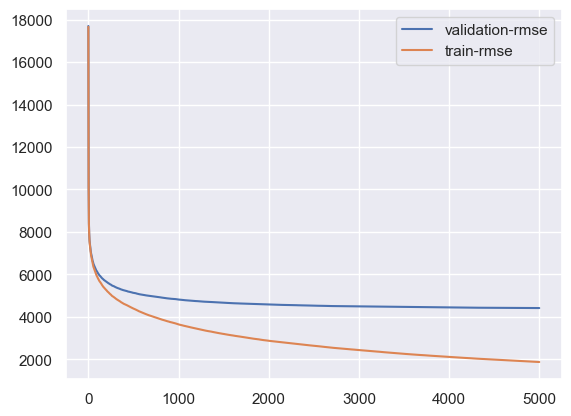

RMSE of train data:  1874.0021221648005
RMSE of test data:  4415.5836672051955
R2 Score of test data: 0.903646256658246


In [234]:
# Train a separate model to do feature importance
model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=True) 


In [235]:
# calculate and plot the feature importance for random forest model.
rf_pipeline = pipelines['random_forest']

rf_model = rf_pipeline['reg']
importances = rf_model.feature_importances_
display(importances.shape)

(25285,)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

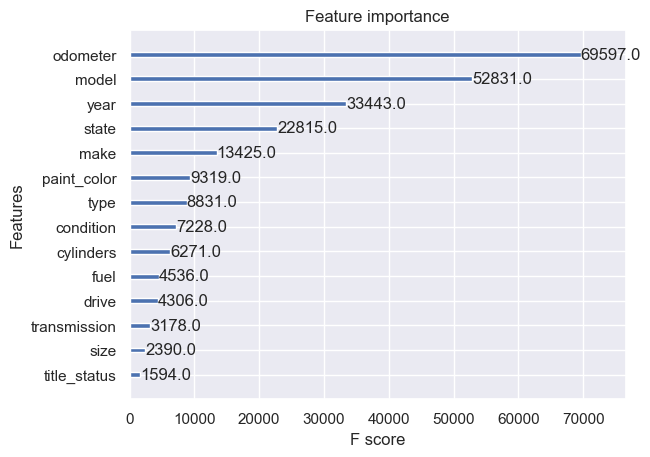

In [236]:
n_features_max = 50

from xgboost import plot_importance
plot_importance(model, max_num_features=20)

In [237]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
    
n_pca_comp = 10

# Using LeaveOneOut and PCA
cat_encoder = Pipeline([
    ('LOO', ce.LeaveOneOutEncoder(return_df=False)),
    ('PCA', PCA(n_components = n_pca_comp,random_state=193))
])

alt_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])

In [238]:
def train_random_forest(xreg_train, yreg_train, xreg_test, yreg_test):


    RF_regressor = Pipeline([('pre_processing',alt_pre_process),
                             ('reg', RandomForestRegressor(max_depth=15,random_state=191))])

    RF_regressor.fit(xreg_train, yreg_train)

    predict_train = RF_regressor.predict(xreg_train)
    predict_test = RF_regressor.predict(xreg_test)

    train_rmse = mean_squared_error(yreg_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(yreg_test, predict_test)**(0.5)
  
    score = RF_regressor.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    
    return RF_regressor


In [239]:
print("Random Forest")
train_random_forest(X_train, y_train, X_test, y_test)    


Random Forest
RMSE of train data:  4810.785364020331
RMSE of test data:  5715.183210629658
model score: 0.839
R2 score 0.8385817371382678


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoder',
                                                  Pipeline(steps=[('LOO',
                                                                   LeaveOneOutEncoder(return_df=False)),
                                                                  ('PCA',
                                                                   PCA(n_components=10,
                                                                       random_state=193))]),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=15, random_state=191))])

In [240]:
def score_xgb_model(X_train, y_train, X_test, y_test):
    n_rounds = 5000    
    xgb_model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=False, n_rounds=n_rounds) 
    return xgb_model

In [241]:
print("XGBoost")

alt_pre_process.fit(X_train, y_train)

# save the fitted preprocessor 
save_model("preprocessor_f", alt_pre_process, use_ts=True)

XGBoost
Saving model to model_preprocessor_f_2023_03_13_14_22_04.pkl


'model_preprocessor_f_2023_03_13_14_22_04.pkl'

[0]	validation-rmse:17333.48104	train-rmse:17249.56200
[50]	validation-rmse:6289.52461	train-rmse:5893.49709
[100]	validation-rmse:6099.02427	train-rmse:5589.97923
[150]	validation-rmse:5958.41049	train-rmse:5359.41525
[200]	validation-rmse:5858.80535	train-rmse:5170.00807
[250]	validation-rmse:5774.93386	train-rmse:5002.85778
[300]	validation-rmse:5716.50742	train-rmse:4876.05717
[350]	validation-rmse:5662.52454	train-rmse:4748.64285
[400]	validation-rmse:5612.38533	train-rmse:4621.57191
[450]	validation-rmse:5567.11129	train-rmse:4512.56526
[500]	validation-rmse:5526.86518	train-rmse:4419.02389
[550]	validation-rmse:5491.15791	train-rmse:4327.75668
[600]	validation-rmse:5467.03754	train-rmse:4248.81993
[650]	validation-rmse:5438.04823	train-rmse:4167.40841
[700]	validation-rmse:5416.44188	train-rmse:4099.71712
[750]	validation-rmse:5393.52924	train-rmse:4021.87318
[800]	validation-rmse:5368.27334	train-rmse:3957.14032
[850]	validation-rmse:5346.15676	train-rmse:3897.72134
[900]	valid

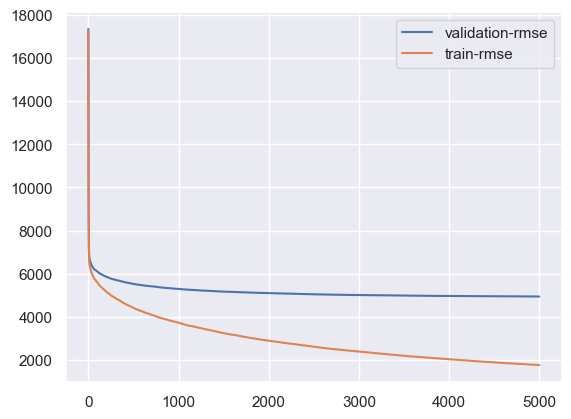

RMSE of train data:  1771.4766651398668
RMSE of test data:  4944.281393534352
R2 Score of test data: 0.8791911598987936


In [242]:
X_pre_train =  alt_pre_process.transform(X_train)
X_pre_test =  alt_pre_process.transform(X_test)

xgb_model = score_xgb_model(X_pre_train, y_train, X_pre_test, y_test)

In [246]:
# save the model
save_model("xgboost", xgb_model, use_ts=True)

Saving model to model_xgboost_2023_03_13_16_35_43.pkl


'model_xgboost_2023_03_13_16_35_43.pkl'